<a href="https://colab.research.google.com/github/SanaSNavas27/finalproject/blob/main/waterfall.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [144]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [145]:
import pandas as pd
import numpy as np
df = pd.read_excel("/content/drive/MyDrive/finaldata.xlsx",sheet_name="Sheet1" )

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            365 non-null    datetime64[ns]
 1   Black Carbon    365 non-null    float64       
 2   Dust            365 non-null    float64       
 3   Organic Carbon  365 non-null    float64       
 4   Sea Salt        365 non-null    float64       
 5   Sulfate         365 non-null    float64       
 6   AOD             365 non-null    float64       
 7   ARF_SUR         365 non-null    float64       
 8   ARF_TOA         365 non-null    float64       
 9   ARF_ATM         365 non-null    float64       
 10  1000            365 non-null    float64       
 11  925             365 non-null    float64       
 12  850             365 non-null    float64       
 13  700             365 non-null    float64       
 14  600             365 non-null    float64       
 15  500   

In [148]:
df.describe(
)

,Date,Black Carbon,Dust,Organic Carbon,Sea Salt,Sulfate,AOD,ARF_SUR,ARF_TOA,ARF_ATM,...,30,20,15,10,7,5,3,2,1.5,1
count,365,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,...,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,2015-07-02 00:00:00,0.004094,0.067148,0.044153,0.063657,0.132745,-54.358651,-14.960836,-9.406493,5.554343,...,216.186547,221.863617,225.412517,229.652585,234.135486,240.185806,251.945928,259.718167,263.746750,266.666461
min,2015-01-01 00:00:00,0.001314,0.005948,0.011167,0.010853,0.029978,-9999.000000,-32.564503,-21.498726,0.503516,...,210.314804,215.918701,219.149292,220.952606,224.640335,231.160202,241.201813,250.305389,256.167938,262.425415
25%,2015-04-02 00:00:00,0.002243,0.020751,0.020833,0.024340,0.086992,0.308454,-17.727561,-11.112164,3.668937,...,214.831421,220.645370,224.176514,228.787582,233.168060,238.768280,250.377502,258.097443,262.388092,265.484253
50%,2015-07-02 00:00:00,0.003673,0.049617,0.039398,0.034942,0.118708,0.397775,-14.320002,-8.941457,5.199706,...,216.438141,222.091537,225.875031,230.038788,234.322006,240.174118,251.927597,259.588745,263.591034,266.521576
75%,2015-10-01 00:00:00,0.005503,0.099260,0.056779,0.078001,0.158995,0.513658,-11.847508,-6.895610,7.035916,...,217.761154,223.469208,226.869766,230.934418,235.447449,241.768845,253.566147,261.240570,265.051483,267.651520
max,2015-12-31 00:00:00,0.009665,0.348149,0.185266,0.369686,0.373240,1.329046,-6.053989,-3.603367,13.823184,...,219.388092,225.677139,229.852127,234.122894,239.171326,247.471039,258.359344,266.017914,269.569977,271.285217
std,NaN,0.002080,0.056454,0.029978,0.063382,0.061204,739.173796,4.720051,3.301170,2.461923,...,1.914048,2.036806,2.058559,2.133015,2.135796,2.382659,2.569534,2.538738,2.238581,1.670716


In [149]:
df=df.drop("Date",axis=1)

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 33 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Black Carbon    365 non-null    float64
 1   Dust            365 non-null    float64
 2   Organic Carbon  365 non-null    float64
 3   Sea Salt        365 non-null    float64
 4   Sulfate         365 non-null    float64
 5   AOD             365 non-null    float64
 6   ARF_SUR         365 non-null    float64
 7   ARF_TOA         365 non-null    float64
 8   ARF_ATM         365 non-null    float64
 9   1000            365 non-null    float64
 10  925             365 non-null    float64
 11  850             365 non-null    float64
 12  700             365 non-null    float64
 13  600             365 non-null    float64
 14  500             365 non-null    float64
 15  400             365 non-null    float64
 16  300             365 non-null    float64
 17  250             365 non-null    flo

In [151]:

df = df[df['AOD'] != -9999]

# Check the result
print("DataFrame after eliminating -9999 values in the AOD column:")
print(df.head())
print("DataFrame info:")
df.info()

DataFrame after eliminating -9999 values in the AOD column:
   Black Carbon      Dust  Organic Carbon  Sea Salt   Sulfate       AOD  \
0      0.005958  0.019366        0.059087  0.024181  0.158504  0.344608   
1      0.005628  0.020028        0.053890  0.018044  0.160012  0.373974   
2      0.004598  0.017004        0.043461  0.010853  0.126752  0.301531   
3      0.004868  0.014273        0.046138  0.012320  0.133098  0.290705   
4      0.005733  0.011245        0.053947  0.018818  0.169862  0.389040   

     ARF_SUR   ARF_TOA   ARF_ATM        1000  ...          30          20  \
0 -13.037181 -7.806388  5.230792  297.142181  ...  212.396011  216.616531   
1 -13.547692 -7.789671  5.758022  297.413849  ...  212.616913  216.386108   
2 -12.147840 -6.527802  5.620038  297.789246  ...  211.346405  217.119888   
3 -12.318655 -6.350877  5.967778  298.414734  ...  213.107071  217.420197   
4 -14.356131 -7.684608  6.671523  298.637970  ...  212.864822  217.734009   

           15          10 

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 363 entries, 0 to 364
Data columns (total 33 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Black Carbon    363 non-null    float64
 1   Dust            363 non-null    float64
 2   Organic Carbon  363 non-null    float64
 3   Sea Salt        363 non-null    float64
 4   Sulfate         363 non-null    float64
 5   AOD             363 non-null    float64
 6   ARF_SUR         363 non-null    float64
 7   ARF_TOA         363 non-null    float64
 8   ARF_ATM         363 non-null    float64
 9   1000            363 non-null    float64
 10  925             363 non-null    float64
 11  850             363 non-null    float64
 12  700             363 non-null    float64
 13  600             363 non-null    float64
 14  500             363 non-null    float64
 15  400             363 non-null    float64
 16  300             363 non-null    float64
 17  250             363 non-null    float64


In [153]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

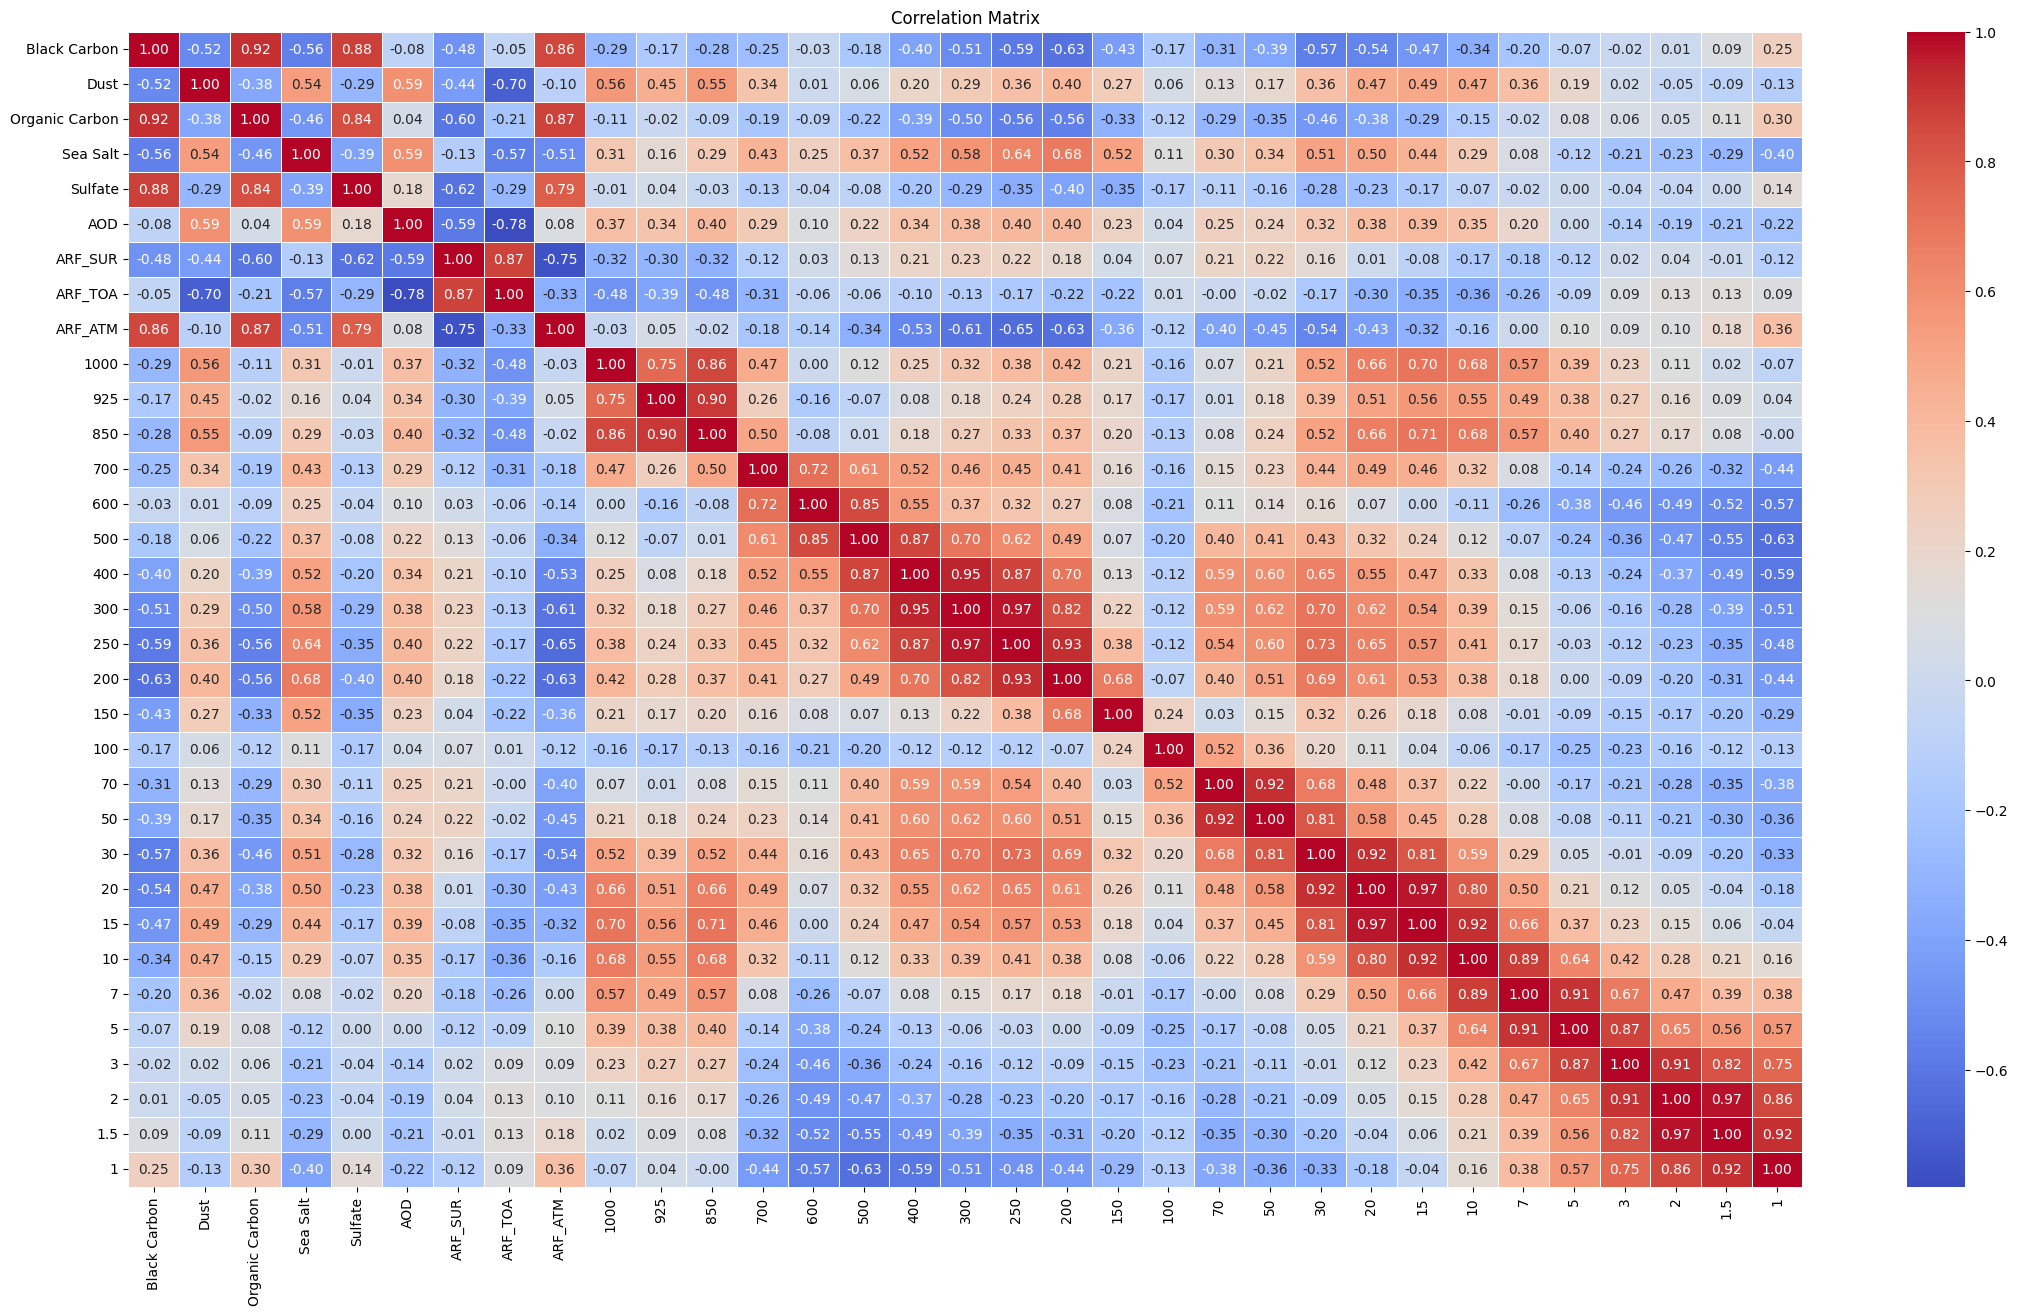

In [154]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Plot the correlation matrix
plt.figure(figsize=(27, 15))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [155]:
duplicate_rows = df[df.duplicated()]
print(duplicate_rows)


Empty DataFrame
Columns: [Black Carbon, Dust, Organic Carbon, Sea Salt, Sulfate, AOD, ARF_SUR, ARF_TOA, ARF_ATM, 1000, 925, 850, 700, 600, 500, 400, 300, 250, 200, 150, 100, 70, 50, 30, 20, 15, 10, 7, 5, 3, 2, 1.5, 1]
Index: []

[0 rows x 33 columns]


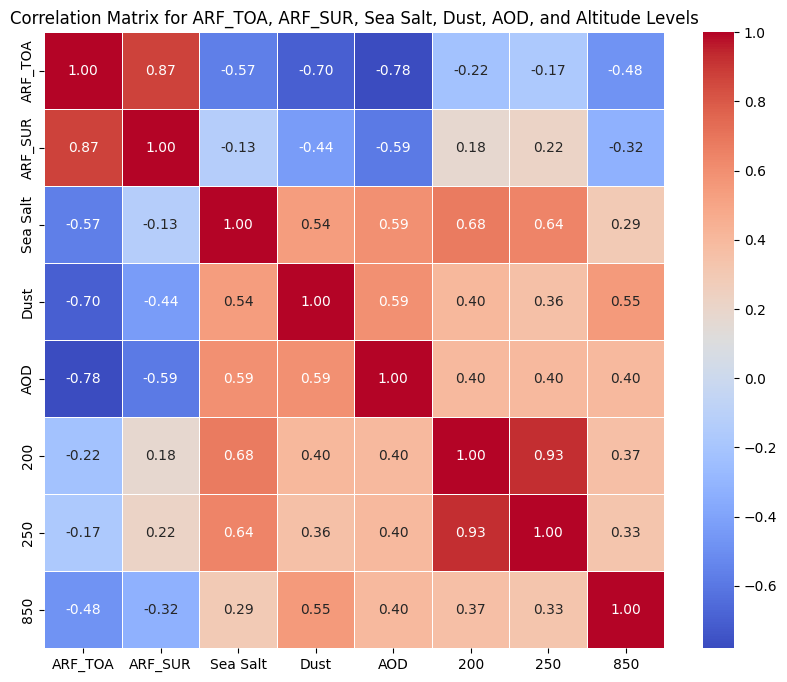

In [156]:
# Specified columns to include, converted to strings
columns_of = ['ARF_TOA', 'ARF_SUR', 'Sea Salt', 'Dust', 'AOD', '200', '250', '850']
columns_of = list(map(str, columns_of))

# Convert DataFrame column names to strings
df.columns = df.columns.astype(str)

# Filter the DataFrame to include only the specified columns
df_filtered = df[columns_of]

# Calculate the correlation matrix
corr_matrix = df_filtered.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix for ARF_TOA, ARF_SUR, Sea Salt, Dust, AOD, and Altitude Levels")
plt.show()

In [157]:
from sklearn.preprocessing import MinMaxScaler

columns_to_normaliz = ['ARF_TOA', 'ARF_SUR', 'Sea Salt', 'Dust','200','250','850']

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Normalize the specified columns
df[columns_to_normaliz] = scaler.fit_transform(df[columns_to_normaliz])



In [158]:
features = ['ARF_TOA', 'ARF_SUR', 'Sea Salt', 'Dust','200','250','850']
target = 'AOD'

X = df[features]
y = df[target]

In [159]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [163]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,r2_score

In [164]:
# Create and train the SVR model
svr_model = SVR(kernel='poly')  # You can also try 'linear', 'poly', etc.
svr_model.fit(X_train, y_train)

# Make predictions
y_pred = svr_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 0.0065781593051759115
R^2 Score: 0.7851911581757116


In [165]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

# Define the parameter grid
param_grid = {
    'kernel': ['poly'],
    'degree': [2, 3, 4],
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 1]
}

# Initialize SVR
svr = SVR()

# Initialize GridSearchCV
grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Predict and evaluate
y_pred = grid_search.best_estimator_.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Best Parameters: {'C': 0.1, 'degree': 3, 'epsilon': 0.01, 'kernel': 'poly'}
Best Score: -0.009473225326532842
Mean Squared Error: 0.006331226197773065
R^2 Score: 0.7932547231257945


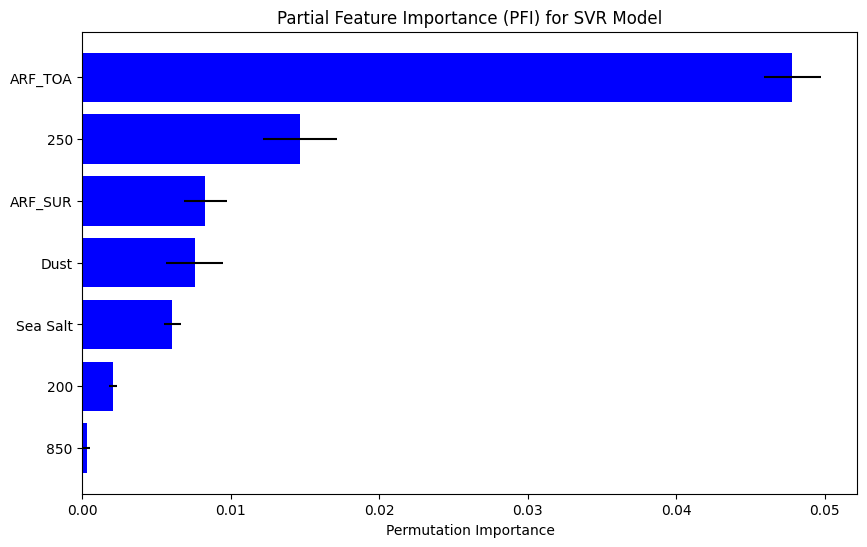

In [166]:
# Calculate permutation importance
results = permutation_importance(grid_search.best_estimator_, X_test, y_test, scoring='neg_mean_squared_error')

# Extract importance values
importance_means = results.importances_mean
importance_std = results.importances_std

# Create a DataFrame for easy plotting
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importance_means,
    'Std Dev': importance_std
})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], xerr=importance_df['Std Dev'], color='blue')
plt.xlabel('Permutation Importance')
plt.title('Partial Feature Importance (PFI) for SVR Model')
plt.gca().invert_yaxis()  # Highest importance at the top
plt.show()

In [167]:
pip install shap

  0%|          | 0/73 [00:00<?, ?it/s]

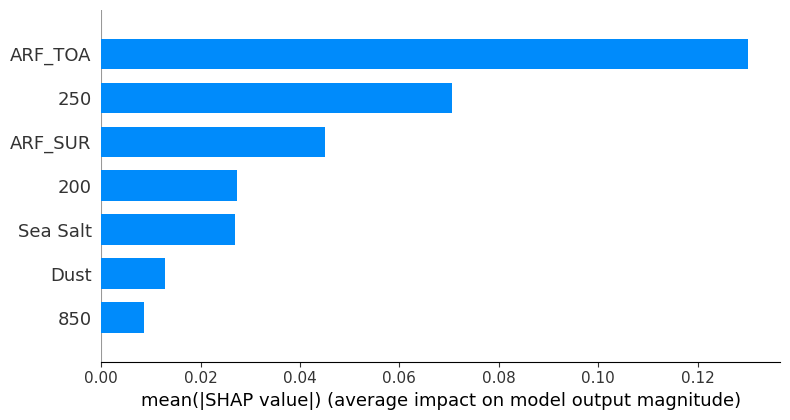

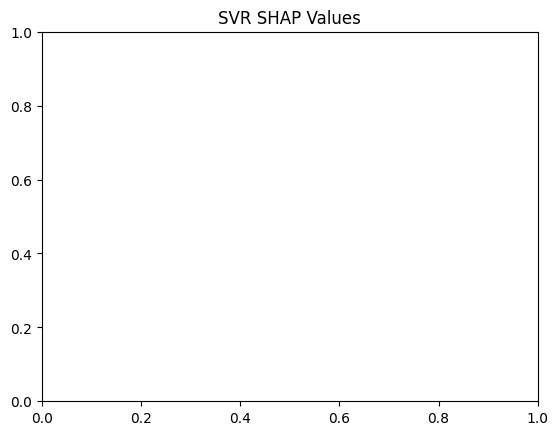

In [168]:
import shap
import matplotlib.pyplot as plt

# Use the best model from GridSearchCV
best_svr = grid_search.best_estimator_

# Create a SHAP explainer using KernelExplainer
# Note: KernelExplainer might be slower for large datasets
explainer = shap.KernelExplainer(best_svr.predict, shap.sample(X_train, 100))

# Compute SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Generate a summary plot with vertical bar plot type
shap.summary_plot(shap_values, X_test, plot_type='bar')
plt.title("SVR SHAP Values")

# Display the plot
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


  0%|          | 0/73 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
/usr

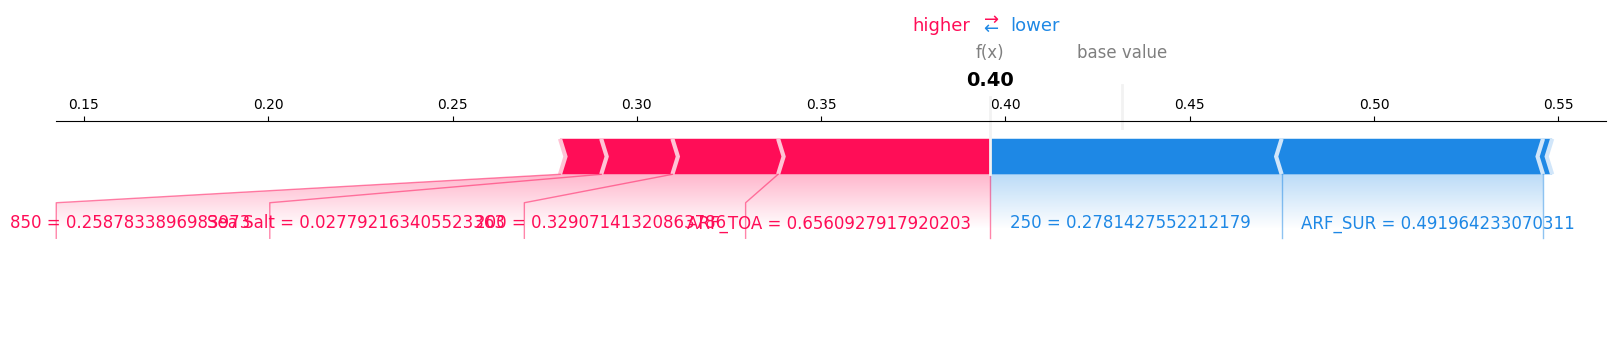

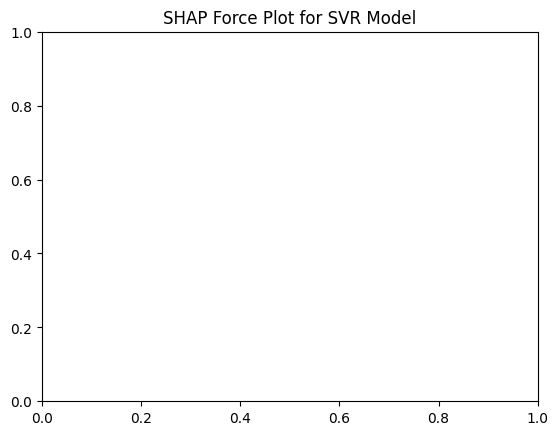

In [169]:
# Define a function to get model predictions
def predict_fn(x):
    return best_svr.predict(x)

# Create a SHAP explainer using KernelExplainer
# Use a subset of the training data as background
background_data = X_train.sample(n=100, random_state=42)

explainer = shap.KernelExplainer(predict_fn, background_data)

# Compute SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Select an instance for the SHAP plot
instance_idx = 2  # Change this index to view a different instance
instance = X_test.iloc[instance_idx]

# Compute SHAP values for the selected instance
shap_values_instance = shap_values[instance_idx]

# Plot SHAP force plot for the selected instance
shap.initjs()
shap.force_plot(
    explainer.expected_value,
    shap_values_instance,  # SHAP values for the selected instance
    instance,
    feature_names=X_test.columns,
    matplotlib=True
)
plt.title("SHAP Force Plot for SVR Model")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


  0%|          | 0/73 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
/usr

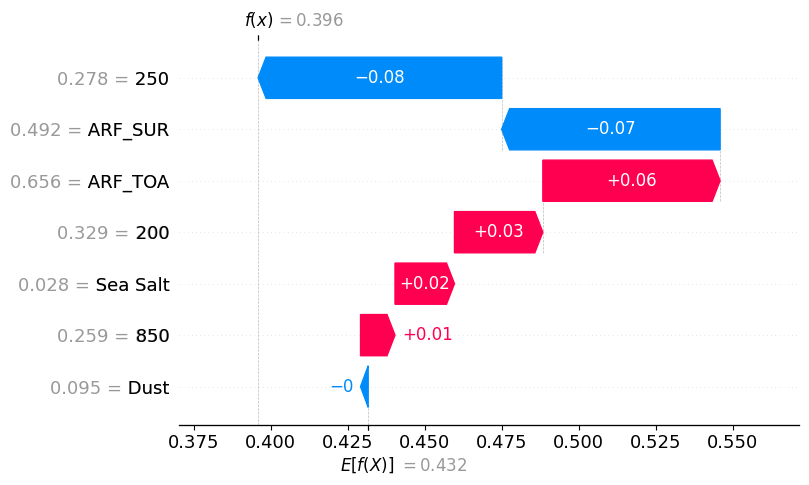

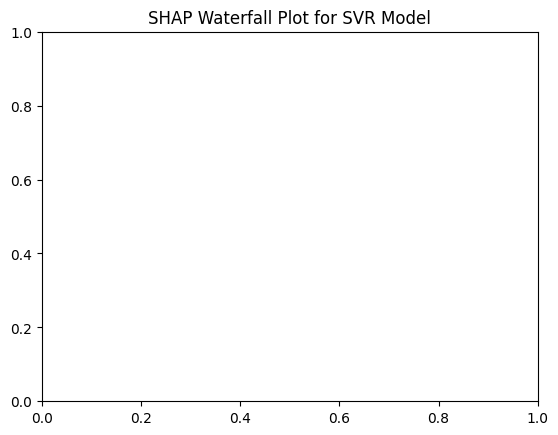

In [170]:
explainer = shap.KernelExplainer(predict_fn, background_data)

# Compute SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Select an instance for the SHAP plot
instance_idx = 2  # Change this index to view a different instance
instance = X_test.iloc[instance_idx]

# Compute SHAP values for the selected instance
shap_values_instance = shap_values[instance_idx]

# Create a SHAP Explanation object for the selected instance
shap_explanation = shap.Explanation(
    values=shap_values_instance,
    base_values=explainer.expected_value,
    data=instance,
    feature_names=X_test.columns
)

# Plot SHAP waterfall plot for the selected instance
shap.waterfall_plot(shap_explanation)
plt.title("SHAP Waterfall Plot for SVR Model")
plt.show()

In [171]:
from sklearn.preprocessing import PolynomialFeatures

In [172]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

In [173]:
# Define the polynomial degree
degree = 2  # You can change this value to experiment with different degrees

# Create a pipeline with polynomial features and linear regression
pipeline = Pipeline([

    ('poly', PolynomialFeatures(degree=degree)),  # Generate polynomial features
    ('regressor', LinearRegression())  # Fit a linear regression model
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 0.006611394282588827
R^2 Score: 0.7841058747894447


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


  0%|          | 0/73 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid

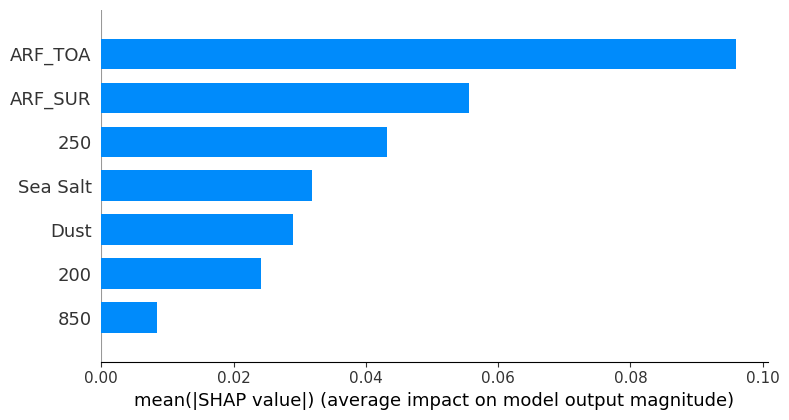

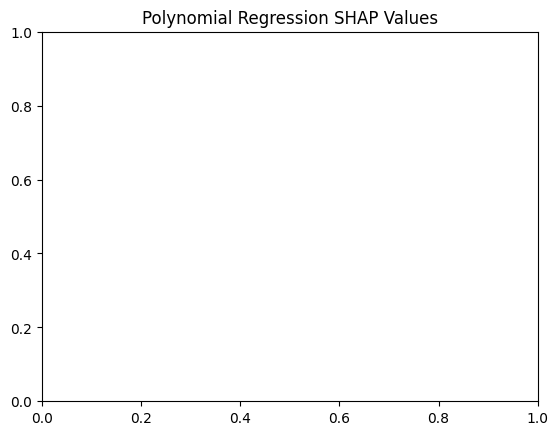

In [174]:
# Define a function to get model predictions
def predict_fn(x):
    return pipeline.predict(x)

# Create a SHAP explainer using KernelExplainer
# Use a subset of the training data as background
background_data = X_train.sample(n=100, random_state=42)

explainer = shap.KernelExplainer(predict_fn, background_data)

# Compute SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Generate a summary plot with vertical bar plot type
shap.summary_plot(shap_values, X_test, plot_type='bar')
plt.title("Polynomial Regression SHAP Values")

# Display the plot
plt.show()

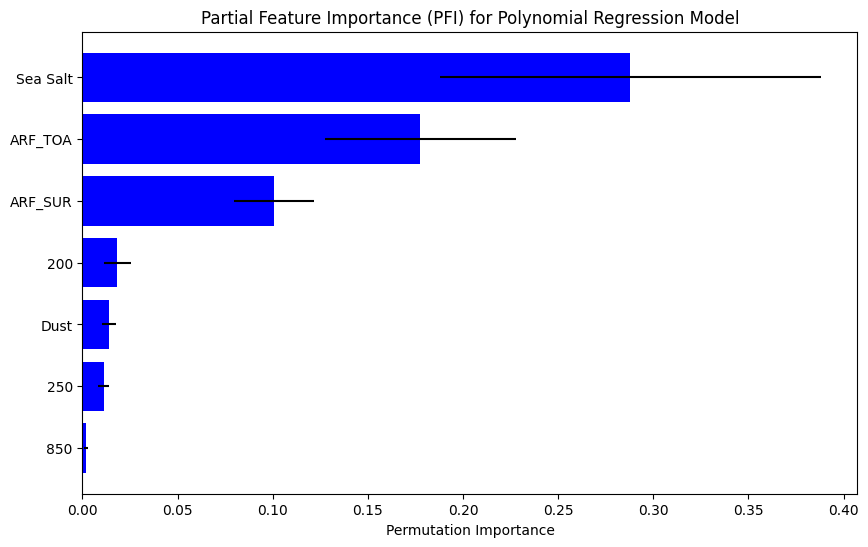

In [175]:
# Calculate permutation importance
results = permutation_importance(pipeline, X_test, y_test, scoring='neg_mean_squared_error', n_repeats=10, random_state=42)

# Extract importance values
importance_means = results.importances_mean
importance_std = results.importances_std

# Create a DataFrame for easy plotting
importance_df = pd.DataFrame({
    'Feature': features,  # Original feature names
    'Importance': importance_means,
    'Std Dev': importance_std
})

# Since polynomial features increase dimensionality, you might need to adjust this for better visualization
# For simplicity, assuming you want to see original features impact, which is not directly straightforward with polynomial features.
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], xerr=importance_df['Std Dev'], color='blue')
plt.xlabel('Permutation Importance')
plt.title('Partial Feature Importance (PFI) for Polynomial Regression Model')
plt.gca().invert_yaxis()  # Highest importance at the top
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


  0%|          | 0/73 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid

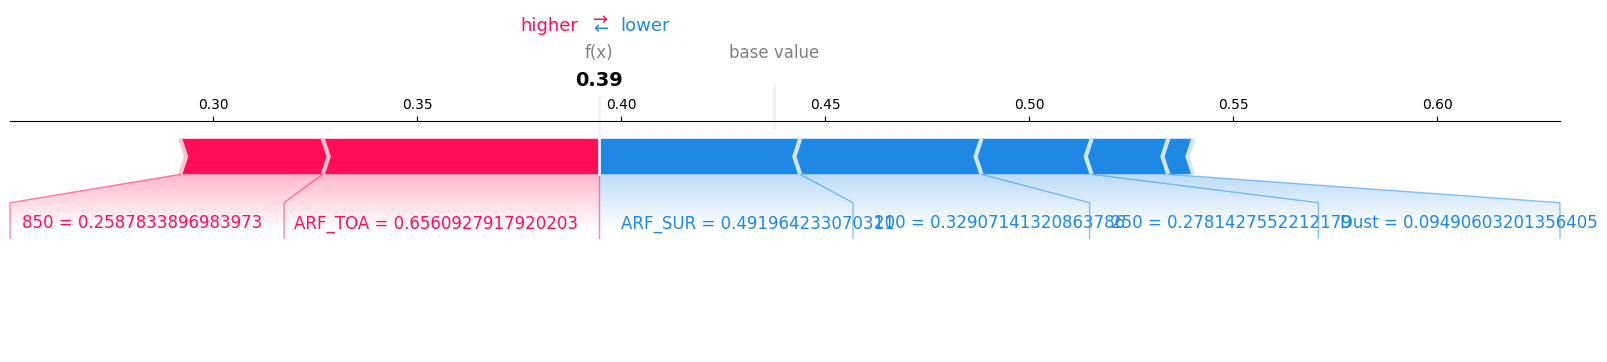

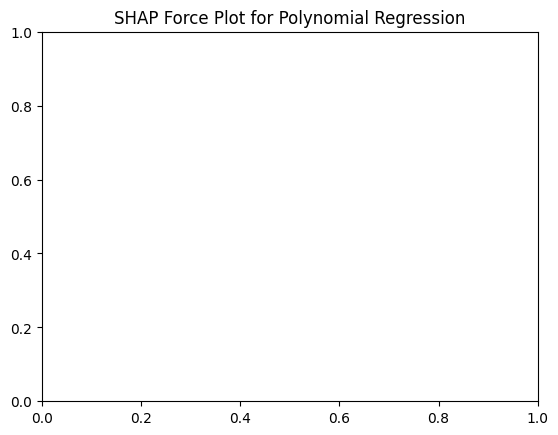

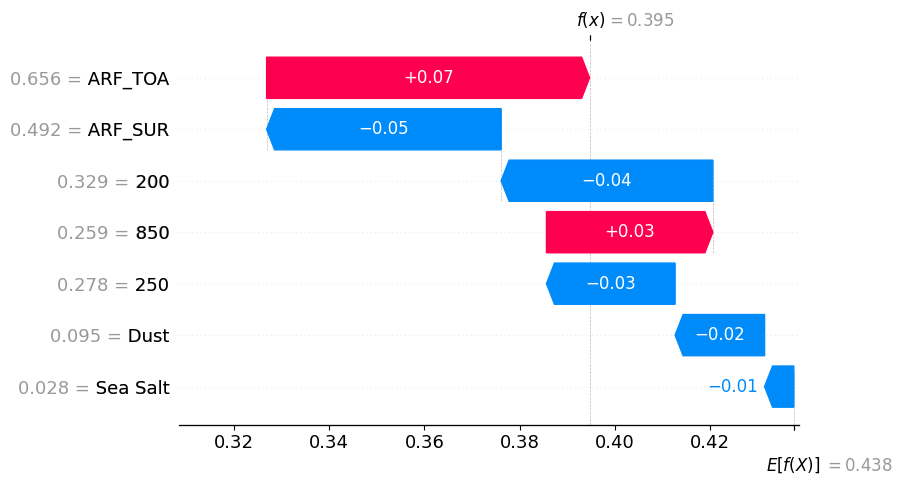

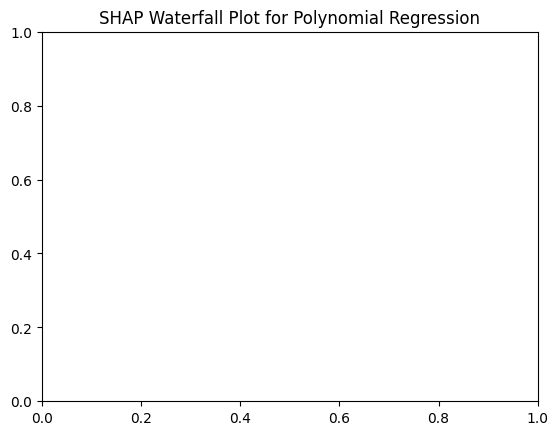

In [176]:
# Define a function to get model predictions
def predict_fn(x):
    return pipeline.predict(x)

# Create a SHAP explainer using KernelExplainer
# Use a subset of the training data as background
background_data = X_train.sample(n=100, random_state=42)

explainer = shap.KernelExplainer(predict_fn, background_data)

# Compute SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Select an instance for SHAP plots
instance_idx = 2  # Change this index to view a different instance
instance = X_test.iloc[instance_idx]

# Compute SHAP values for the selected instance
shap_values_instance = shap_values[instance_idx]

# Create a SHAP Explanation object for the selected instance
shap_explanation = shap.Explanation(
    values=shap_values_instance,
    base_values=explainer.expected_value,
    data=instance,
    feature_names=X_test.columns
)

# Plot SHAP force plot for the selected instance
shap.initjs()
shap.force_plot(
    explainer.expected_value,
    shap_values_instance,  # SHAP values for the selected instance
    instance,
    feature_names=X_test.columns,
    matplotlib=True
)
plt.title("SHAP Force Plot for Polynomial Regression")
plt.show()

# Plot SHAP waterfall plot for the selected instance
shap.waterfall_plot(shap_explanation)
plt.title("SHAP Waterfall Plot for Polynomial Regression")
plt.show()

In [177]:
from sklearn.linear_model import BayesianRidge

In [178]:
# Create and train the Bayesian Ridge model
bayesian_ridge_model = BayesianRidge()
bayesian_ridge_model.fit(X_train, y_train)

# Make predictions
y_pred = bayesian_ridge_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


Mean Squared Error: 0.008688055976660546
R^2 Score: 0.716292787165766


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but BayesianRidge was fitted with feature names
  warnings.warn(


  0%|          | 0/73 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but BayesianRidge was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but BayesianRidge was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but BayesianRidge was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but BayesianRidge was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but BayesianRidge was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but Bayes

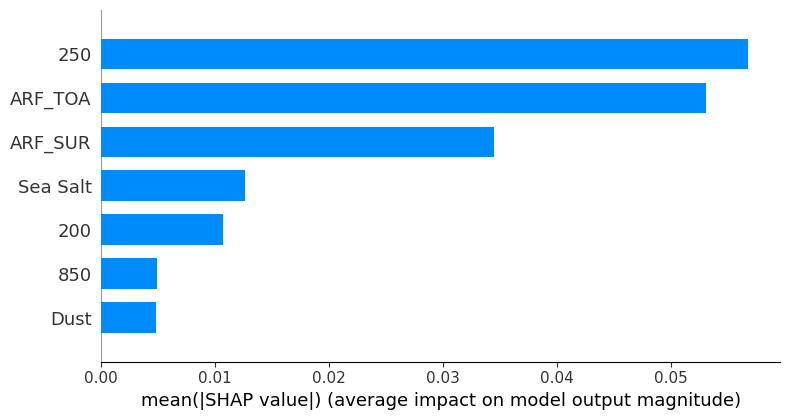

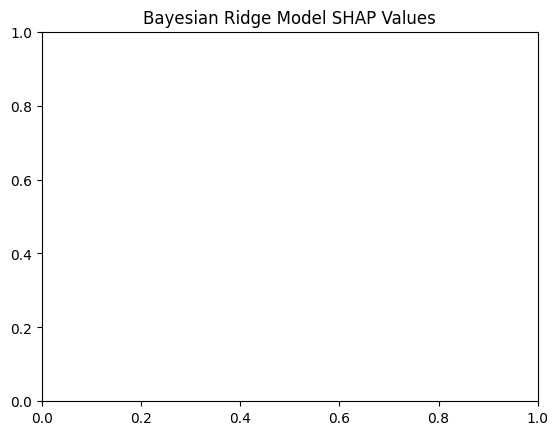

In [179]:
# Define a function to get model predictions
def predict_fn(x):
    return bayesian_ridge_model.predict(x)

# Create SHAP explainer using KernelExplainer
# Use a subset of the training data as background
background_data = shap.sample(X_train, 100)

explainer = shap.KernelExplainer(predict_fn, background_data)

# Compute SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Convert X_test to a DataFrame with exact feature names
X_test_df = pd.DataFrame(X_test, columns=features)

# Generate a summary plot with vertical bar plot type
shap.summary_plot(shap_values, X_test_df, plot_type='bar')
plt.title("Bayesian Ridge Model SHAP Values")

# Display the plot
plt.show()

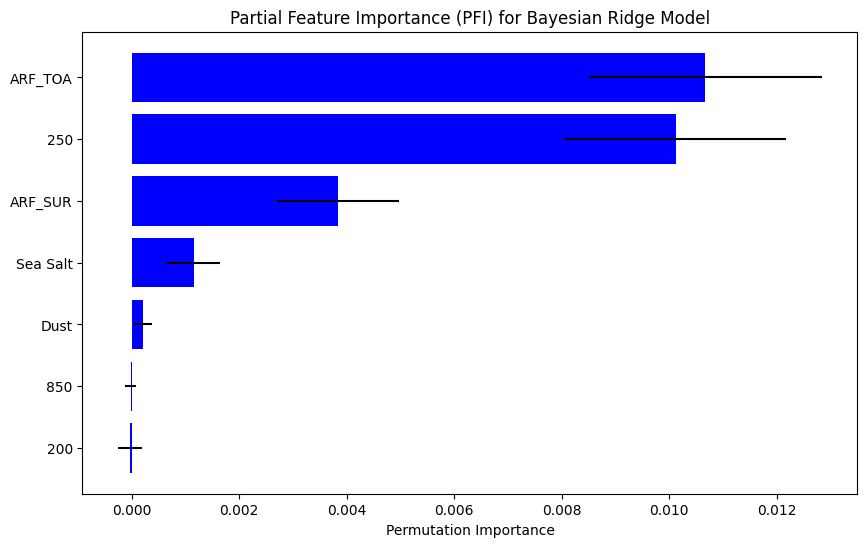

In [180]:
# Calculate permutation importance
results = permutation_importance(bayesian_ridge_model, X_test, y_test, scoring='neg_mean_squared_error', n_repeats=10, random_state=42)

# Extract importance values
importance_means = results.importances_mean
importance_std = results.importances_std

# Create a DataFrame for easy plotting
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importance_means,
    'Std Dev': importance_std
})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], xerr=importance_df['Std Dev'], color='blue')
plt.xlabel('Permutation Importance')
plt.title('Partial Feature Importance (PFI) for Bayesian Ridge Model')
plt.gca().invert_yaxis()  # Highest importance at the top
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but BayesianRidge was fitted with feature names
  warnings.warn(


  0%|          | 0/73 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but BayesianRidge was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but BayesianRidge was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but BayesianRidge was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but BayesianRidge was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but BayesianRidge was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but Bayes

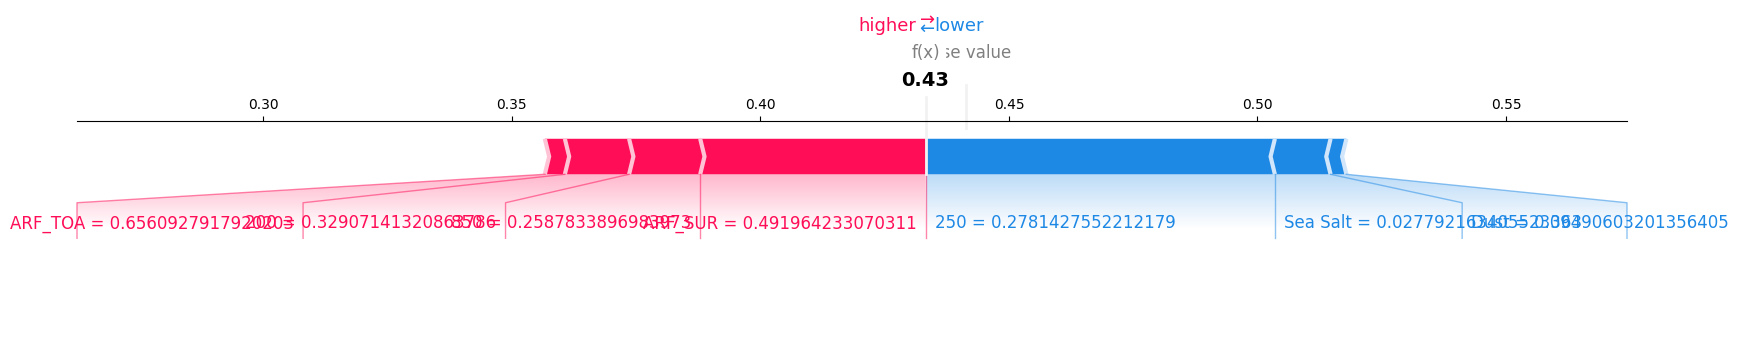

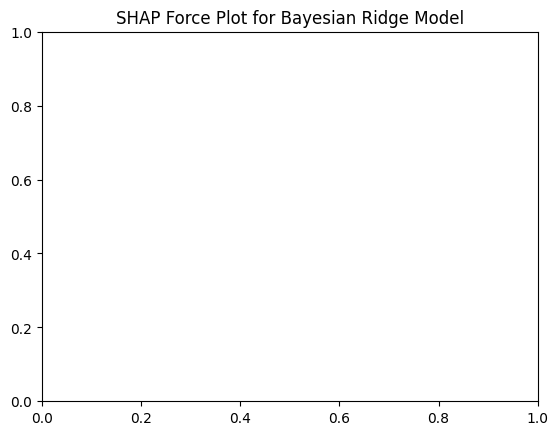

In [181]:
# Define a function to get model predictions
def predict_fn(x):
    return bayesian_ridge_model.predict(x)

# Create a SHAP explainer using KernelExplainer
# Use a subset of the training data as background
background_data = X_train.sample(n=100, random_state=42)

explainer = shap.KernelExplainer(predict_fn, background_data)

# Compute SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Select an instance for SHAP plots
instance_idx = 2  # Change this index to view a different instance
instance = X_test.iloc[instance_idx]

# Compute SHAP values for the selected instance
shap_values_instance = shap_values[instance_idx]

# Plot SHAP force plot for the selected instance
shap.initjs()
shap.force_plot(
    explainer.expected_value,
    shap_values_instance,  # SHAP values for the selected instance
    instance,
    feature_names=X_test.columns,
    matplotlib=True
)
plt.title("SHAP Force Plot for Bayesian Ridge Model")
plt.show()

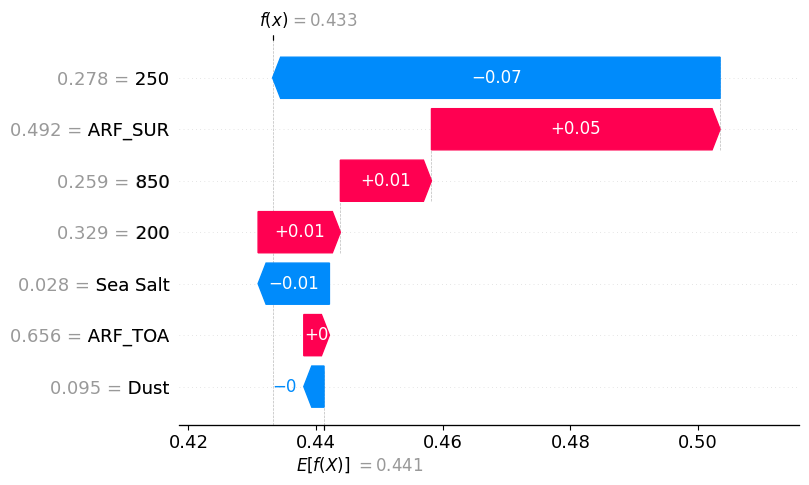

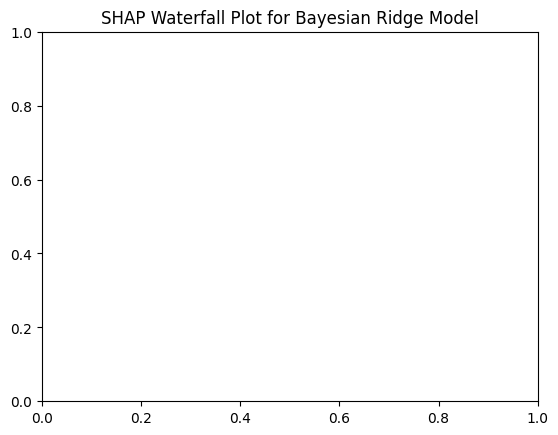

In [182]:
# Create a SHAP Explanation object for the selected instance
shap_explanation = shap.Explanation(
    values=shap_values_instance,
    base_values=explainer.expected_value,
    data=instance,
    feature_names=X_test.columns
)

# Plot SHAP waterfall plot for the selected instance
shap.waterfall_plot(shap_explanation)
plt.title("SHAP Waterfall Plot for Bayesian Ridge Model")
plt.show()